# Accuracies graphs
Will plot all 'history' files from within designated folder

## Defining first paths and importing relevant packages

In [1]:
import sys
sys.path
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import os
print(os.getcwd())
os.environ.update(os.environ)
# Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = os.getcwd()
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])
# sys.path.append('../')
sys.path.append('ramp-code/')

# used later on in the script:
import datetime
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import cv2
import warnings
warnings.filterwarnings("ignore")
# initialise keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

Num GPUs Available:  1
/home/annazan/fAIr-utilities
/home/annazan/fAIr-utilities


In [2]:
### defining path variables
# base_path = "/Users/azanchetta/fAIr-utilities" # this path is used in all the rest of the code, so change accordingly
base_path = '/home/annazan/fAIr-utilities/'

print(f"\n---\nCurrent working directory {base_path}")
history_dir = f'{base_path}/outputs/accuracies/'
history_dir = f'{base_path}outputs/accuracies/'

dir_list = os.listdir(history_dir)
print(dir_list)
# from pathlib import Path

# Path(dir_list).stem




---
Current working directory /home/annazan/fAIr-utilities/
['model102_td391_bch16_epc20.csv', 'history_model135_td459_bch4_epc20.npy', 'model114_td399_bch8_epc20.csv', 'model136_td462_bch16_epc20.csv', 'graph_model98_td373_bch16_epc20.png', 'model110_td394_bch8_epc20.csv', 'graph_model102_td391_bch4_epc20.png', 'model149_td489_bch16_epc20.csv', 'history_model112_td397_bch2_epc20.npy', 'model149_td489_bch8_epc20.csv', 'graph_model135_td459_bch8_epc20.png', 'graph_model114_td399_bch16_epc20.png', 'graph_model112_td397_bch2_epc20.png', 'history_model51_td364_bch16_epc5.npy', 'graph_model97_td372_bch4_epc20.png', 'model136_td462_bch8_epc2.csv', 'graph_model136_td462_bch8_epc20.png', 'graph_model95_td370_bch2_epc20.png', 'model97_td372_bch10_epc3.csv', 'history_model113_td398_bch16_epc20.npy', 'model112_td397_bch4_epc20.csv', 'history_model113_td398_bch2_epc20.npy', 'graph_model113_td398_bch8_epc20.png', 'graph_model51_td364_bch16_epc5.png', 'model51_td364_bch2_epc20.csv', 'graph_model112

In [ ]:
# create list of history files (they store the model's training results) to upload
import glob, os
os.chdir(history_dir)
files_list = []
for file in glob.glob("*.npy"):
    files_list.append(file)
    print(file)

## (Now obsolete) Option with matplotlib
first trial with standard package (plt)

In [6]:
for name in files_list:
    print(f'name is: {name}')
    name_parts = name.split("_")
    # print(f'name is: {name_parts}')
    city = f'{name_parts[1]}_{name_parts[2]}'
    # print(f'city {city}')
    name_for_graph = f'{city}_{name_parts[3]}_{name_parts[4]}'
    name_noextension = name_for_graph.split(".")[0]
    print(name_noextension)
    
    history_name_with_path = f'{history_dir}/{name}'
    
    # load the history
    history_saved=np.load(history_name_with_path,allow_pickle='TRUE').item()
    # history_saved.keys()

    # save to dataframe
    history_saved_df = pd.DataFrame.from_dict(history_saved)
    # history_saved_df

    # plot the training and validation accuracy and loss at each epoch
    print("Generating graphs ....")
    # graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
    graph_file_name = f'graph_{name_noextension}.png'
    graph_output = f'{history_dir}/{graph_file_name}'

    loss = history_df[:,"loss"]
    # val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    # acc = history.history["sparse_categorical_accuracy"]
    # val_acc = history.history["val_sparse_categorical_accuracy"]

    #---
    acc =  history_df[:,"categorical_accuracy"]
    val_acc =  history_df[:,"val_categorical_accuracy"]
    acc1 =  history_df[:,"recall_1"]
    val_acc1 = history.history["val_recall_1"]
    acc2 =  history_df[:,"precision_1"]
    val_acc2 = history.history["val_precision_1"]
    acc3 = history.history["ohe_iou"]
    val_acc3 = history.history["val_ohe_iou"]
    loss = history.history["loss"]
    #---


    # Plot training and validation accuracy
    plt.plot(epochs, acc, "y", label="Train cat accuracy")
    plt.plot(epochs, val_acc, "y", linestyle='dashed', label="Valid cat accuracy")
    plt.plot(epochs, acc1, "b", label="Train recall")
    plt.plot(epochs, val_acc1, "b", linestyle='dashed', label="Valid recall")
    plt.plot(epochs, acc2, "c", label="Train precision")
    plt.plot(epochs, val_acc2, "c", linestyle='dashed', label="Valid precision")
    plt.plot(epochs, acc3, "r", label="Train IoU")
    plt.plot(epochs, val_acc3, "r", linestyle='dashed', label="Valid Iou")
    plt.plot(epochs, loss, "m", linestyle='dotted', label="Loss")


    # Set labels and title
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")

    plt.legend()
    plt.savefig(
        f"{graph_output}"
    )
    print(f"Graph generated at : {graph_output}")
    plt.show()
    
    # clearing up the plot the figure for next plot
    plt.clf()
    plt.cla()
    plt.close() # clear the plot to avoid overlapping figures! https://stackoverflow.com/questions/17106288/how-to-forget-previous-plots-how-can-i-flush-refresh


name is: history_model135_td459_bch4_epc20.npy
model135_td459_bch4_epc20
Generating graphs ....


NameError: name 'history_df' is not defined

In [ ]:
for name in files_list:
    print(f'name is: {name}')
    name_parts = name.split("_")
    # print(f'name is: {name_parts}')
    city = f'{name_parts[1]}_{name_parts[2]}'
    # print(f'city {city}')
    name_for_graph = f'{city}_{name_parts[3]}_{name_parts[4]}'
    name_noextension = name_for_graph.split(".")[0]
    print(name_noextension)
    
    history_name_with_path = f'{history_dir}/{name}'
    csv_name_with_path = f'{history_dir}/{name_noextension}.csv'
    
    # load the history and save to df
    history_df=pd.read_csv(csv_name_with_path)

    # plot the training and validation accuracy and loss at each epoch
    print("Generating graphs ....")
    # graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
    graph_file_name = f'graph_{name_noextension}.png'
    graph_output = f'{history_dir}{graph_file_name}'

    loss =  history_df.loc[:,"loss"]
    epochs = range(1, len(loss) + 1)
    #---
    acc = history_df.loc[:,"categorical_accuracy"]
    val_acc = history_df.loc[:,"val_categorical_accuracy"]
    acc1 = history_df.loc[:,"recall_1"]
    val_acc1 = history_df.loc[:,"val_recall_1"]
    acc2 = history_df.loc[:,"precision_1"]
    val_acc2 = history_df.loc[:,"val_precision_1"]
    acc3 = history_df.loc[:,"ohe_iou"]
    val_acc3 = history_df.loc[:,"val_ohe_iou"]
    # loss = history_df.loc[:,"loss"]
    #---

    # Plot training and validation accuracy
    plt.plot(epochs, acc, "y", label="Train cat accuracy")
    plt.plot(epochs, val_acc, "y", linestyle='dashed', label="Valid cat accuracy")
    plt.plot(epochs, acc1, "b", label="Train recall")
    plt.plot(epochs, val_acc1, "b", linestyle='dashed', label="Valid recall")
    plt.plot(epochs, acc2, "c", label="Train precision")
    plt.plot(epochs, val_acc2, "c", linestyle='dashed', label="Valid precision")
    plt.plot(epochs, acc3, "r", label="Train IoU")
    plt.plot(epochs, val_acc3, "r", linestyle='dashed', label="Valid Iou")
    plt.plot(epochs, loss, "m", linestyle='dotted', label="Loss")


    # Set labels and title
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")

    plt.legend()
    plt.savefig(
        f"{graph_output}"
    )
    print(f"Graph generated at : {graph_output}")
    plt.show()
    
    # clearing up the plot the figure for next plot
    plt.clf()
    plt.cla()
    plt.close() # clear the plot to avoid overlapping figures! https://stackoverflow.com/questions/17106288/

## Option with Seaborn
trial with more cool graphic

In [4]:
import seaborn as sns

In [5]:
print(history_dir)

/home/annazan/fAIr-utilities/outputs/accuracies/


In [7]:
for name in files_list:
    print(f'name is: {name}')
    name_parts = name.split("_")
    # print(f'name is: {name_parts}')
    city = f'{name_parts[1]}_{name_parts[2]}'
    # print(f'city {city}')
    name_for_graph = f'{city}_{name_parts[3]}_{name_parts[4]}'
    name_noextension = name_for_graph.split(".")[0]
    print(name_noextension)
    
    history_name_with_path = f'{history_dir}{name}'
    csv_name_with_path = f'{history_dir}{name_noextension}.csv'
    
    # load the history and save to df
    history_df=pd.read_csv(csv_name_with_path)

    
    # plot the training and validation accuracy and loss at each epoch
    print("Generating graphs ....")
    # graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
    graph_file_name = f'graph_{name_noextension}.png'
    graph_output = f'{history_dir}{graph_file_name}'

    loss =  history_df.loc[:,"loss"]
    epochs = range(1, len(loss) + 1)

#  ---
    # convert to long (tidy) form
    history_df.assign(epoch=range(1, len(loss) + 1))
    history_df['epoch'] = range(1, len(history_df) + 1) # create column "epoch"
    history_df = history_df.drop('Unnamed: 0', axis=1) # get rid of column "Unnamed: 0"
    
    # melt the dataframe
    dfm = history_df.melt('epoch', var_name='col_names', value_name='vals')
    # generate column for type train/valid:
        # old manual version
        # dfm = dfm.assign(type='train')
        # dfm.loc[(len(dfm.index)/2):len(dfm.index),'type'] = 'valid'
    dfm['type'] = np.where(dfm.col_names.str.contains("val"), "valid", "train")
    # generate column with fancier name of the metric, for plotting
    dfm['metric'] = np.where(dfm.col_names.str.contains("loss"), "Loss",
                    np.where(dfm.col_names.str.contains("precision"), "Precision",
                    np.where(dfm.col_names.str.contains("recall"), "Recall",
                    np.where(dfm.col_names.str.contains("iou"), "IoU",
                    np.where(dfm.col_names.str.contains("categorical"), "Accuracy", "")))))
#  ---
    # old manual version
    # dfm = dfm.assign(metric='Loss')
    # dfm.loc[20:39,'metric'] = 'Precision'
    # dfm.loc[120:139,'metric'] = 'Precision'
    # dfm.loc[40:59,'metric'] = 'Recall'
    # dfm.loc[140:159,'metric'] = 'Recall'
    # dfm.loc[60:79,'metric'] = 'IoU'
    # dfm.loc[160:179,'metric'] = 'IoU'
    # dfm.loc[80:99,'metric'] = 'Accuracy'
    # dfm.loc[180:199,'metric'] = 'Accuracy'
# ---
    palette_div=sns.color_palette("Dark2", 10)
    sns.set_palette(palette_div)
    sns.set_style("whitegrid")
    sns_plot = sns.lineplot(data=dfm,
                x="epoch",
                y="vals",
                hue='metric',
                palette=palette_div,
                style='type')
    sns_plot.set(xlabel='Epochs',
       ylabel='Accuracy',
       title='Training/validation accuracies')
    
    sns_plot.set_ylim(bottom=0, top=1) # this is to avoid Loss values to alter the graph limits
    sns_plot.xaxis.set_major_locator(ticker.MultipleLocator(5)) # adding ticks at multiples of 5
    sns_plot.xaxis.set_major_formatter(ticker.ScalarFormatter())
    sns_plot.get_figure().savefig(graph_output)
    # plt.show()
    sns_plot.get_figure().show()
    
    # plt.savefig(
    #     f"{graph_output}"
    # )
    print(f"Graph generated at : {graph_output}")

    
    # # clearing up the figure for next plot
    sns_plot.get_figure().clf()

    # plt.clf()
    # plt.cla()
    # plt.close() # clear the plot to avoid overlapping figures! https://stackoverflow.com/questions/17106288/

name is: history_model97_td372_bch4_epc2.npy
model97_td372_bch4_epc2
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/outputs/accuracies/graph_model97_td372_bch4_epc2.png
name is: history_model112_td397_bch4_epc5.npy
model112_td397_bch4_epc5
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/outputs/accuracies/graph_model112_td397_bch4_epc5.png
name is: history_model112_td397_bch8_epc5.npy
model112_td397_bch8_epc5
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/outputs/accuracies/graph_model112_td397_bch8_epc5.png
name is: history_model112_td397_bch16_epc5.npy
model112_td397_bch16_epc5
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/outputs/accuracies/graph_model112_td397_bch16_epc5.png
name is: history_model112_td397_bch16_epc20.npy
model112_td397_bch16_epc20
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/outputs/accuracies/graph_model112_td397_bch16_epc20.png
name

<Figure size 640x480 with 0 Axes>

same as before, but adding a twin axes for Loss

In [7]:
#  TODO: adding temporary list for testing different colors
# ---
files_list = ["history_model97_td372_bch8_epc20.npy", "history_model97_td372_bch16_epc20.npy"]

# ---

In [60]:
print(palette_div)

[(0.0, 0.4981591003460206, 1.0), (0.0, 0.986936604088444, 0.368548620127168), (0.5182809189613916, 0.9998402909550916, 0.04680407496331866), (1.0, 0.8743443122968675, 0.0), (1.0, 0.14918899559823937, 0.0), (0.6912889749219927, 0.2682950819672131, 0.9811260366441659)]


name is: history_model97_td372_bch8_epc20.npy
model97_td372_bch8_epc20
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/outputs/accuracies/graph_model97_td372_bch8_epc20.png


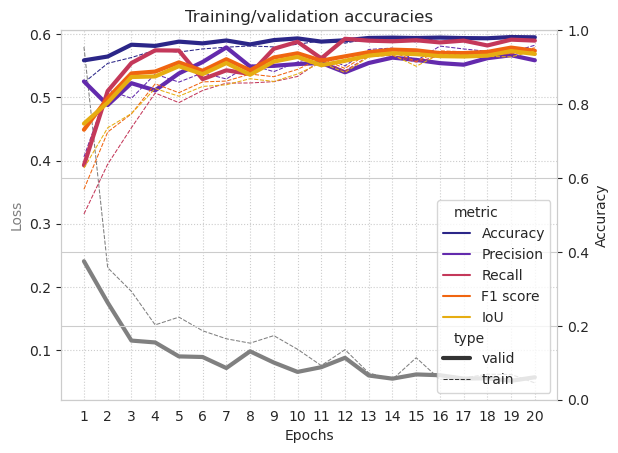

name is: history_model97_td372_bch16_epc20.npy
model97_td372_bch16_epc20
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/outputs/accuracies/graph_model97_td372_bch16_epc20.png


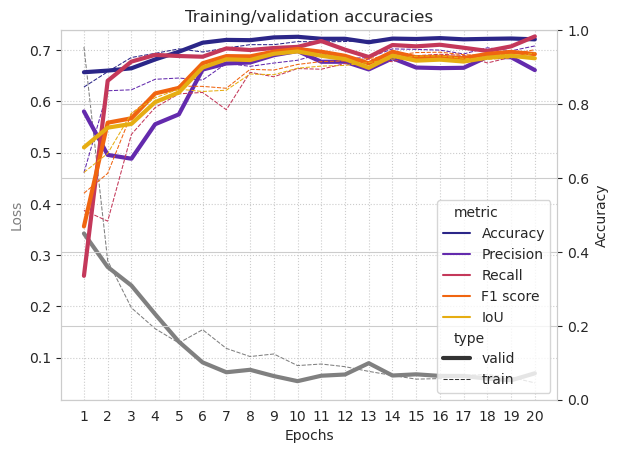

In [65]:
for name in files_list:
    print(f'name is: {name}')
    name_parts = name.split("_")
    # print(f'name is: {name_parts}')
    city = f'{name_parts[1]}_{name_parts[2]}'
    # print(f'city {city}')
    name_for_graph = f'{city}_{name_parts[3]}_{name_parts[4]}'
    name_noextension = name_for_graph.split(".")[0]
    print(name_noextension)
    
    history_name_with_path = f'{history_dir}{name}'
    csv_name_with_path = f'{history_dir}{name_noextension}.csv'
    
    # load the history and save to df
    history_df=pd.read_csv(csv_name_with_path)

    
    # plot the training and validation accuracy and loss at each epoch
    print("Generating graphs ....")
    # graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
    graph_file_name = f'graph_{name_noextension}.png'
    graph_output = f'{history_dir}{graph_file_name}'

    loss =  history_df.loc[:,"loss"]
    val_loss = history_df.loc[:,"val_loss"]
    epochs = list(range(1, len(loss) + 1))

# ---
    # dataframe with only loss - to be able to map it later
    loss_df = pd.DataFrame(data={'epoch': epochs, 'loss': loss, 'val_loss': val_loss})
    # melt the dataframe
    dfm_loss = loss_df.melt('epoch', var_name='col_names', value_name='vals')
    # generate column for type train/valid:
    dfm_loss['type'] = np.where(dfm_loss.col_names.str.contains("val"), "valid", "train")
    # generate column with fancier name of the metric, for plotting
    dfm_loss['metric'] = np.where(dfm_loss.type.str.contains("train"), "Loss", "")
#  ---
    # convert to long (tidy) form the history file
    history_df.assign(epoch=range(1, len(loss) + 1))
    history_df['epoch'] = range(1, len(history_df) + 1) # create column "epoch"
    history_df = history_df.drop('Unnamed: 0', axis=1) # get rid of column "Unnamed: 0"
    history_df = history_df.drop('loss', axis = 1) # get rid of column 'loss' to be able to plot it separately
    history_df = history_df.drop('val_loss', axis = 1) # get rid of column 'loss' to be able to plot it separately
    # melt the dataframe
    dfm = history_df.melt('epoch', var_name='col_names', value_name='vals')
    # generate column for type train/valid:
    dfm['type'] = np.where(dfm.col_names.str.contains("val"), "valid", "train")
    # generate column with fancier name of the metric, for plotting
    dfm['metric'] = np.where(dfm.col_names.str.contains("precision"), "Precision",
                    np.where(dfm.col_names.str.contains("recall"), "Recall",
                    np.where(dfm.col_names.str.contains("iou"), "IoU",
                    np.where(dfm.col_names.str.contains("categorical"), "Accuracy",
                    np.where(dfm.col_names.str.contains("f1"), "F1 score",
                    "")))))
# ---
    # palette_div=sns.color_palette("Dark2", 10)
    palette_div=sns.color_palette("CMRmap",6)
    sns.set_palette(palette_div)
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots()
    sns.lineplot(data=dfm_loss,
                x="epoch",
                y="vals",
                size='type',
                size_order=("valid", "train"),
                color = 'gray',
                style='type',
                style_order=("valid", "train"),
                legend=False)
    ax1.set(xlabel='Epochs',
            ylabel='Accuracy',
            title='Training/validation accuracies')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # adding ticks at multiples of 2
    ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
    # ax1.tick_params(axis='y')
    ax1.set_ylabel('Loss', color='tab:grey')
    ax1.grid(True, linestyle=':')
    #  introducing second axis label
    ax2 = ax1.twinx()
    sns.lineplot(data=dfm,
                x="epoch",
                y="vals",
                hue='metric',
                palette=palette_div,
                size = 'type',
                size_order=("valid", "train"),
                style='type',
                style_order=("valid", "train")
                )
    # ax2.tick_params(axis='y')
    ax2.set_ylabel('Accuracy')
    ax2.set_ylim(bottom=0, top=1) # this is to avoid Loss values to alter the graph limits, but doesn't look good
    
    # sns_plot.get_figure().savefig(graph_output)
    # # plt.show()
    # sns_plot.get_figure().show()

    plt.savefig(
        f"{graph_output}"
    )
    print(f"Graph generated at : {graph_output}")
    plt.show()
    
    # print(f"Graph generated at : {graph_output}")

    # # clearing up the figure for next plot to avoid overlapping figures! https://stackoverflow.com/questions/17106288/
    # sns_plot.get_figure().clf()
    plt.clf()
    plt.cla()
    plt.close()

## First version in MatPlot (as it was in metric_test.py)

In [2]:
# plot the training and validation accuracy and loss at each epoch
print("Generating graphs ....")
graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
graph_output = f'{path_to_acc_output}/accuracies/{graph_file_name}'

loss = history.history["loss"]
# val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

# acc = history.history["sparse_categorical_accuracy"]
# val_acc = history.history["val_sparse_categorical_accuracy"]

#---
acc = history.history["categorical_accuracy"]
val_acc = history.history["val_categorical_accuracy"]
acc1 = history.history["recall_1"]
val_acc1 = history.history["val_recall_1"]
acc2 = history.history["precision_1"]
val_acc2 = history.history["val_precision_1"]
acc3 = history.history["ohe_iou"]
val_acc3 = history.history["val_ohe_iou"]
loss = history.history["loss"]
#---

# --- Plot training and validation accuracy
plt.plot(epochs, acc, "y", label="Train cat accuracy")
plt.plot(epochs, val_acc, "y", linestyle='dashed', label="Valid cat accuracy")
plt.plot(epochs, acc1, "b", label="Train recall")
plt.plot(epochs, val_acc1, "b", linestyle='dashed', label="Valid recall")
plt.plot(epochs, acc2, "c", label="Train precision")
plt.plot(epochs, val_acc2, "c", linestyle='dashed', label="Valid precision")
plt.plot(epochs, acc3, "r", label="Train IoU")
plt.plot(epochs, val_acc3, "r", linestyle='dashed', label="Valid Iou")
plt.plot(epochs, loss, "m", linestyle='dotted', label="Loss")


# Set labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

plt.legend()
plt.savefig(
    f"{graph_output}"
)

### learning Seaborn

In [8]:
df_for_plot=history_df.iloc[:,1:11]

In [9]:
# convert to long (tidy) form
history_df.assign(epoch=range(1, len(loss) + 1))
dfm = history_df.melt('Unnamed: 0', var_name='cols', value_name='vals')



In [10]:
dfm = dfm.assign(type='train')
dfm.loc[(len(dfm.index)/2):len(dfm.index),'type'] = 'valid'

In [11]:
dfm = dfm.assign(metric='Loss')
dfm.loc[20:39,'metric'] = 'Precision'
dfm.loc[120:139,'metric'] = 'Precision'
dfm.loc[40:59,'metric'] = 'Recall'
dfm.loc[140:159,'metric'] = 'Recall'
dfm.loc[60:79,'metric'] = 'IoU'
dfm.loc[160:179,'metric'] = 'IoU'
dfm.loc[80:99,'metric'] = 'Accuracy'
dfm.loc[180:199,'metric'] = 'Accuracy'

[Text(0.5, 0, 'Epochs'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Training/validation accuracies')]

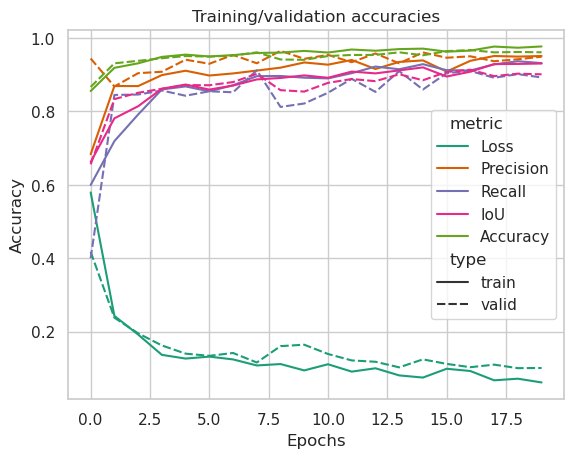

In [24]:
palette_div=sns.color_palette("Dark2", 10)
sns.set_palette(palette_div)
# https://seaborn.pydata.org/tutorial/aesthetics.html
# sns.set_theme()
sns.set_style("whitegrid")
plottt = sns.lineplot(data=dfm,
    x="Unnamed: 0",
    y="vals",
    hue='metric',
    palette=palette_div,
    style='type')
plottt.set(xlabel='Epochs',
    ylabel='Accuracy',
    title='Training/validation accuracies')


[Text(0.5, 0, 'Epochs'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Training/validation accuracies')]

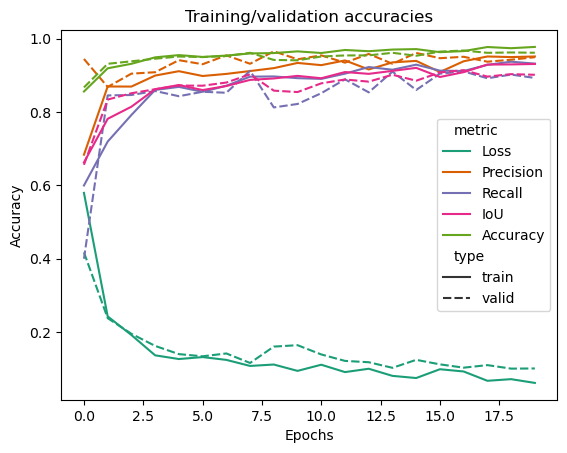

In [16]:
palette_div=sns.color_palette("Dark2", 10)
sns.set_palette(palette_div)
plottt = sns.lineplot(data=dfm,
    x="Unnamed: 0",
    y="vals",
    hue='metric',
    palette=palette_div,
    style='type')
plottt.set(xlabel='Epochs',
    ylabel='Accuracy',
    title='Training/validation accuracies')

<Axes: xlabel='Unnamed: 0', ylabel='vals'>

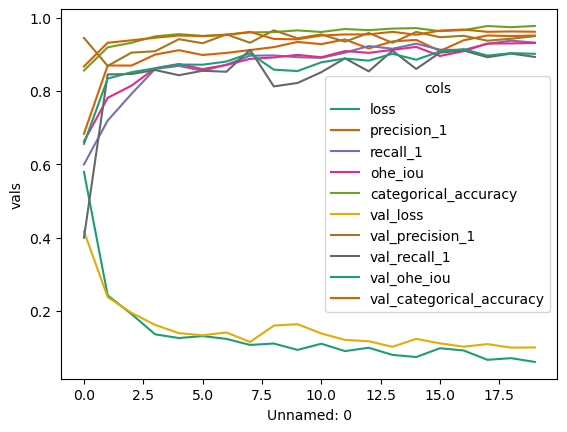

In [13]:
sns.lineplot(x="Unnamed: 0", y="vals", hue='cols', data=dfm)

<Axes: ylabel='recall_1'>

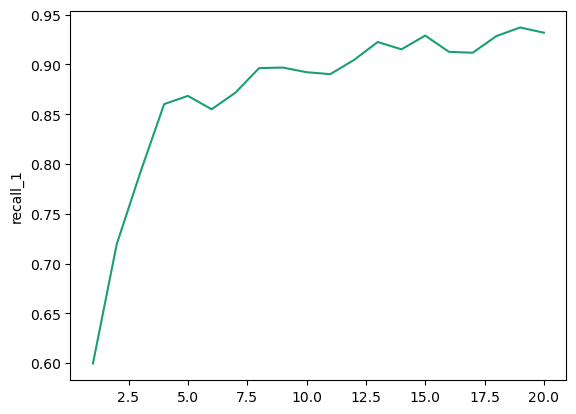

In [14]:
sns.lineplot(
    data=df_for_plot,
    x=range(1, len(loss) + 1), y='recall_1'

)